<a href="https://colab.research.google.com/github/adindapurwita/Pejuang_Data_3/blob/main/Mini_Projek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Data Genre di Webtoon**

# Latar Belakang

Webtoon merupakan suatu aplikasi dimana seseorang dapat membaca atau membuat sebuah komik. Aplikasi ini menjadi sangat populer belakangan ini. Webtoon sendiri menyediakan berbagai macam cerita yang pastinya menarik untuk dibaca. Di dalam webtoon sudah terdapat banyak cerita populer yang kemudian diangkat menjadi drama. Dari sekin banyak tersebut tentunya ada salah satu genre yang sangat banyak dibicarakan atau di angkat menjadi sebuah cerita. Analisis ini bertujuan untuk mencari tau genre webtoon apa yang paling banyak di angkat menjadi cerita komik.

# Pertanyaan Analisis

1. Genre apa yang paling banyak terdapat di Webtoon?

# EDA (Exploratory Data Analisis)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Mengakses data**

In [4]:
df = pd.read_csv('/Webtoon Dataset.csv')
df.head()

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...


Memahami data set

1. id = Nomor
2. Name = Judul Webtoon
3. Writer = Penulis Webtoon
4. Likes = Jumlah suka yang didapat Webtoon
5. Genre = Kategori Webtoon
6. Rating = Penilaian yang didapat
7. subscribers = Jumlah pembaca yang mengikuti cerita
8. Summary = Ringkasan cerita
9. Update = Tanggal webtoon update episode baru
10. Reading links = Link untuk membaca

Dimesi Data

In [ ]:
df.shape

(569, 10)

Variabel Pada Dataset

In [ ]:
df.columns.values

array(['id', 'Name', 'Writer', 'Likes', 'Genre', 'Rating', 'Subscribers',
       'Summary', 'Update', 'Reading Link'], dtype=object)

In [ ]:
df.dtypes

id                int64
Name             object
Writer           object
Likes            object
Genre            object
Rating          float64
Subscribers      object
Summary          object
Update           object
Reading Link     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            569 non-null    int64  
 1   Name          569 non-null    object 
 2   Writer        568 non-null    object 
 3   Likes         569 non-null    object 
 4   Genre         569 non-null    object 
 5   Rating        569 non-null    float64
 6   Subscribers   569 non-null    object 
 7   Summary       569 non-null    object 
 8   Update        569 non-null    object 
 9   Reading Link  569 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 44.6+ KB


**Mengecek Missing Data**

In [ ]:
df.isnull().sum()

id              0
Name            0
Writer          1
Likes           0
Genre           0
Rating          0
Subscribers     0
Summary         0
Update          0
Reading Link    0
dtype: int64

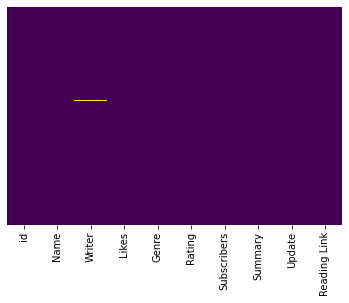

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

**Mengecek Outliner**

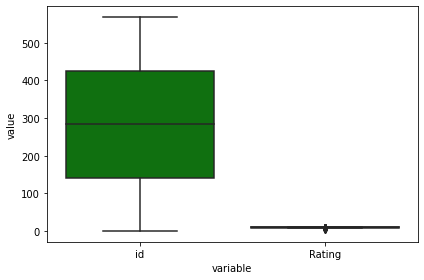

In [ ]:
df1=df.select_dtypes(include=['float64', 'int64']) 

sns.boxplot(x="variable", y="value", color='green', orient='v', data=pd.melt(df1))
plt.tight_layout()

**Melihat Korelasi Data**

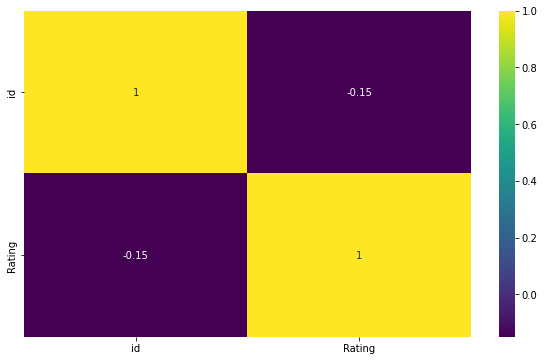

In [ ]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

**Melihat Statistik Data**

In [ ]:
df.describe()

,id,Rating
count,569.000000,569.000000
mean,284.000000,9.418998
std,164.400426,0.557571
min,0.000000,5.410000
25%,142.000000,9.310000
50%,284.000000,9.580000
75%,426.000000,9.730000
max,568.000000,9.930000


# Data Preparation

**Seleksi Kolom**

In [ ]:
df=df.drop(columns=['id', 'Summary', 'Reading Link'])
df.head()

,Name,Writer,Likes,Genre,Rating,Subscribers,Update
0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,UP EVERY TUESDAY
1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,UP EVERY WEDNESDAY
2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,UP EVERY SATURDAY
3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,UP EVERY WEDNESDAY
4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,UP EVERY THURSDAY


In [5]:
df['Genre'].value_counts()

Fantasy          95
Romance          90
Drama            60
Comedy           52
Slice of life    49
Action           47
Thriller         35
Supernatural     33
Sci-fi           32
Superhero        26
Horror           20
Sports           10
Mystery           9
Informative       5
Historical        4
Heartwarming      2
Name: Genre, dtype: int64

## Data Visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

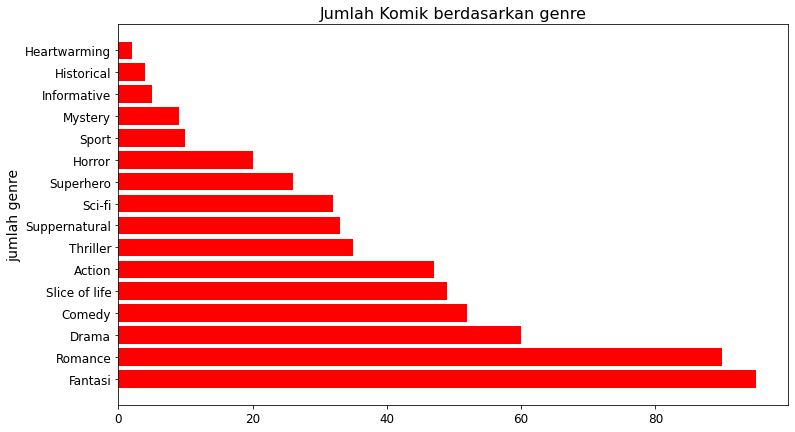

In [8]:
genre = ['Fantasi', 'Romance', 'Drama', 'Comedy', 'Slice of life', 'Action', 'Thriller', 'Suppernatural', 'Sci-fi', 'Superhero', 'Horror', 'Sport', 'Mystery', 'Informative', 'Historical', 'Heartwarming']
jumlah = [95, 90, 60, 52, 49, 47, 35, 33, 32, 26, 20, 10, 9, 5, 4, 2]

plt.figure(figsize=(12,7))
plt.barh(genre, jumlah, color='red')

plt.title('Jumlah Komik berdasarkan genre', size=16)
plt.ylabel('jumlah genre', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()